In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import math
import time
from scipy import ndimage
from scipy.misc import imsave

START = time.time()
img = cv2.imread('einstein.jpg', 0)
img1 = cv2.imread('einstein.jpg')
img = img/255
print('Image shape : ',img.shape)
plt.imshow(img, cmap = 'gray')
plt.show()

Image shape :  (480, 640)


<Figure size 640x480 with 1 Axes>

In [0]:
def calcSigma(no_s,k,s):
    sigma = []
    for i in range(no_s):
        sigma1 = s*(k**i)
        sigma.append(sigma1)

    h = [round(i*6) for i in sigma]
    for i in range(len(h)):
        if h[i]%2 == 0:
            h[i] = h[i]+1
    return sigma,h

In [0]:
def calcLoG(k,sigma,no_s,h):
    LoG = []
    for i in range(no_s):
        LoG1 = np.zeros((h[i],h[i]))
        r1 = int(-(math.floor(h[i]/2)))
        r2 = int(math.floor(h[i]/2))
        for x in range(r1,r2+1):
            for y in range(r1,r2+1):
                LoG1[x+r2,y+r2] = (-1/(math.pi*(sigma[i]**2)))*(1-(((x**2)+(y**2))/(2*(sigma[i]**2))))*np.exp(-((x**2)+(y**2))/(2*(sigma[i]**2)))
        LoG.append(LoG1)
    return LoG

In [0]:
def convPadded(image, Filter,no_s,h):
    start = time.time()
    row = image.shape[0]
    col = image.shape[1]
    convout = []
    for i in range(no_s):
        Filter[i] = np.flipud(np.fliplr(Filter[i]))  
        out = np.zeros_like(image)  
        r = int(math.floor(h[i]/2))+1
        padded = np.zeros((row + h[i]+1, col + h[i]+1))   
        padded[r:-r, r:-r] = image
        for x in range(row): 
            for y in range(col):
                out[x,y]=(Filter[i]*padded[x:x+h[i],y:y+h[i]]).sum()  
        convout.append(out)
    end = time.time()
    print('Time taken for convolution : ', end-start)
    return convout 

In [0]:
def convInbuilt(img,LoG,no_s):
    start = time.time()
    convout = []
    for i in range(no_s): 
        out = np.zeros_like(img)
        out = ndimage.convolve(img,LoG[i],mode = 'constant')
        convout.append(out)
    end = time.time()
    print('Time taken for convolution : ', end-start)
    return convout

In [0]:
def maximaDetection(img,convout,sigma,no_s,threshold):
    start1 = time.time()
    row = img.shape[0]
    col = img.shape[1]
    blob_loc = []
    no_minimas = 0
    for n in range(no_s):
        blob = []
        rad = int(math.sqrt(2)*sigma[n])
        for x in range(row):
            for y in range(col):
                temp = 'minima'
                for o in range(-1,2):
                    for i in range(-1,2):
                        for j in range(-1,2):
                            if x+i >= 0 and y+j >= 0 and x+i < row and y+j < col and n+o >= 0 and n+o < no_s:
                                if convout[n][x,y] > threshold:
                                    if convout[n][x,y] < convout[n+o][x+i,y+j]: temp = 'not minima'   
                                else: temp = 'not minima'
                if temp == 'minima':
                    if x-rad > 0 and y-rad > 0 and x-rad < row and y-rad < col:
                        blob.append([x,y])
                        cv2.circle(img, (y, x), rad, (0,0,255), 1)
        print('No of minimas in scale space', n,': ',len(blob))
        no_minimas = no_minimas + len(blob)
        blob_loc.append(blob)
    end1 = time.time()
    print('Time taken for maxima reduction : ', end1-start1)
    print('Total no. of minimas : ', no_minimas)
    return img,blob_loc
# print(blob_loc)

-0.008826060132838527
(5, 5)


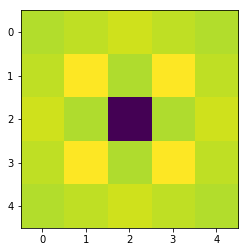

-0.05690931214977041
(5, 5)


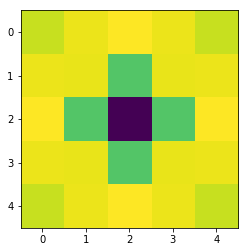

-0.021914195584712186
(7, 7)


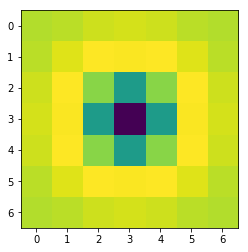

-0.01671200925870449
(9, 9)


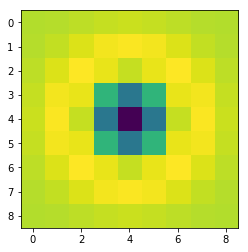

-0.02077299011700594
(11, 11)


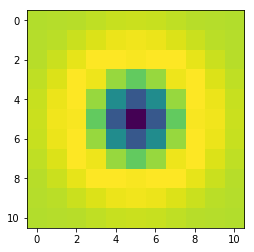

-0.0342221287755885
(13, 13)


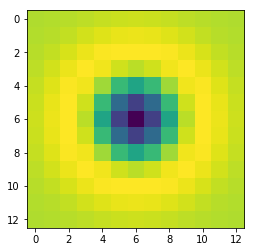

-0.06347792723210935
(15, 15)


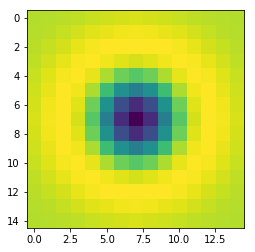

-0.05451228196755459
(19, 19)


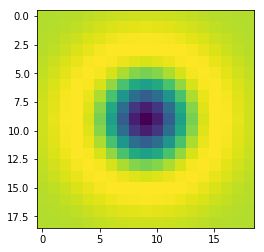

-0.033282753073192034
(25, 25)


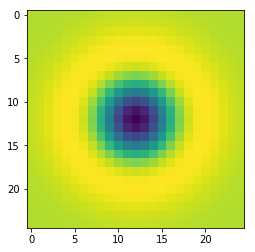

-0.05856145099246554
(29, 29)


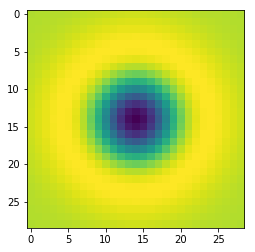

-0.04677916699320339
(37, 37)


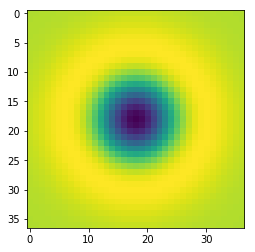

-0.05483616702422342
(45, 45)


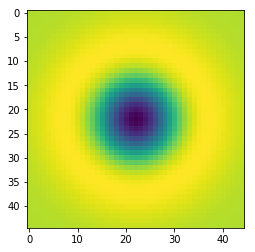

-0.04623402198334614
(57, 57)


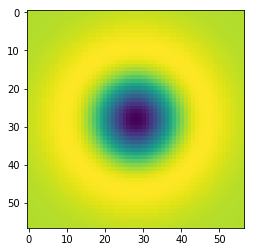

-0.044573858860887244
(71, 71)


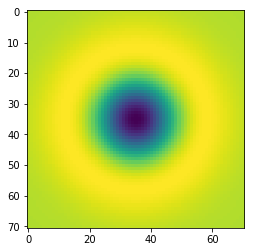

-0.049202849677127264
(87, 87)


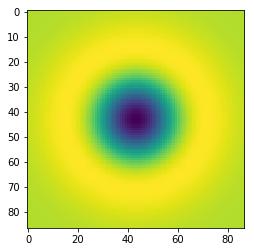

In [0]:
no_s = 15
k = 1.24
s = 1/math.sqrt(2)
threshold = 0.01

sigma,h = calcSigma(no_s,k,s)
LoG = calcLoG(k,sigma,no_s,h)

for i in range(no_s):
#     print(LoG[i])
    print(np.sum(LoG[i]))
    print(LoG[i].shape)
    plt.imshow(LoG[i])
    plt.show()

Time taken for convolution :  59.93228363990784
(480, 640)


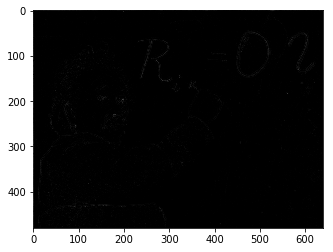

(480, 640)


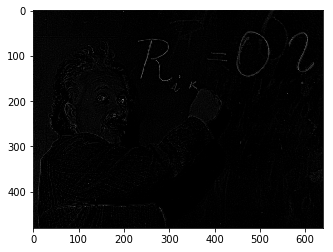

(480, 640)


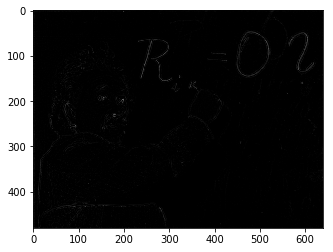

(480, 640)


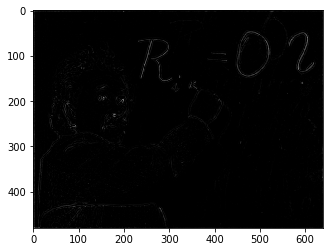

(480, 640)


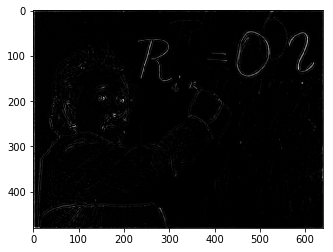

(480, 640)


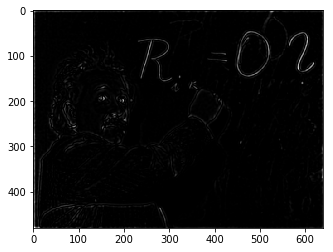

(480, 640)


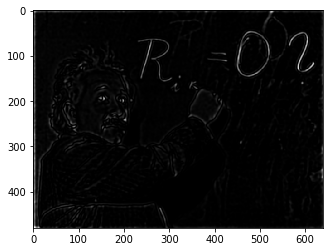

(480, 640)


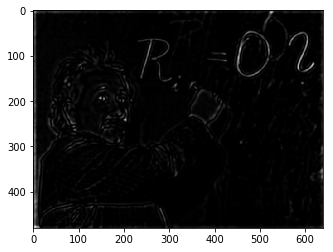

(480, 640)


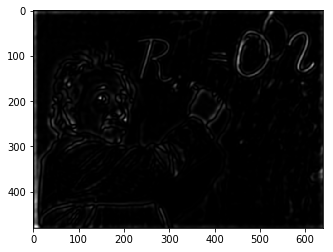

(480, 640)


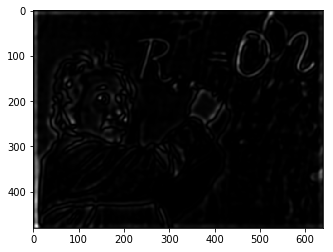

(480, 640)


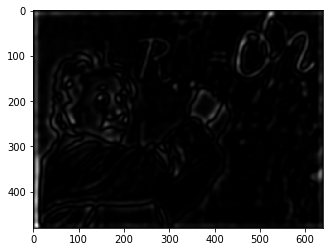

(480, 640)


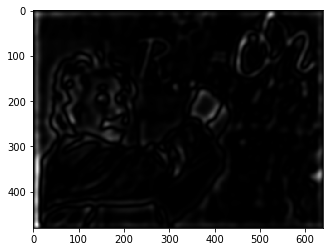

(480, 640)


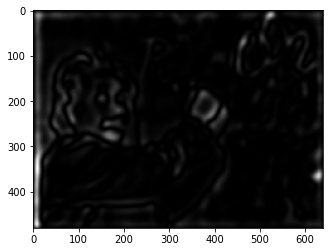

(480, 640)


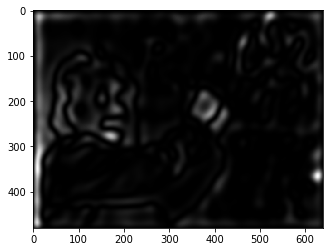

(480, 640)


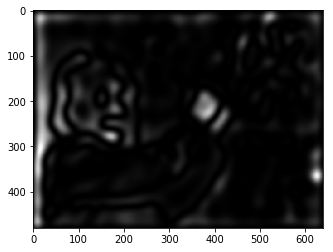

In [0]:
convout = convPadded(img,LoG,no_s,h)
# convout = convInbuilt(img,LoG,no_s)

for i in range(no_s):
    convout[i] = np.square(convout[i])
#     print(convout[i])
    print(convout[i].shape)
    plt.imshow(convout[i],cmap="gray")
    plt.show()

In [0]:
# no_of_bins, bins, patches = plt.hist(convout[0])
# print(no_of_bins)
# print(bins)

In [0]:
img1,blob_loc = maximaDetection(img1,convout,sigma,no_s,threshold)

No of minimas in scale space 0 :  244
No of minimas in scale space 1 :  180
No of minimas in scale space 2 :  12
No of minimas in scale space 3 :  228
No of minimas in scale space 4 :  155
No of minimas in scale space 5 :  132
No of minimas in scale space 6 :  371
No of minimas in scale space 7 :  97
No of minimas in scale space 8 :  87
No of minimas in scale space 9 :  100
No of minimas in scale space 10 :  33
No of minimas in scale space 11 :  39
No of minimas in scale space 12 :  17
No of minimas in scale space 13 :  10
No of minimas in scale space 14 :  30
Time taken for maxima reduction :  153.81145453453064
Total no. of minimas :  1735


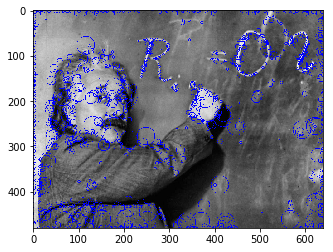

Time taken for the complete program =  219.71183681488037 sec


In [0]:
plt.imshow(img1)
plt.show()
cv2.imwrite('einstein-blobs.png',img1)
# plt.savefig('sunflowers_blob')
print('Time taken for the complete program = ', time.time() - START, 'sec')